In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

loading images...
computing disparity...


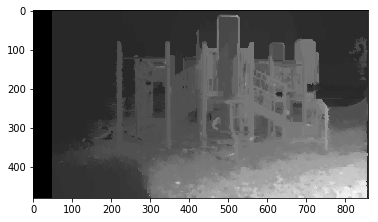

In [2]:
import numpy as np
from sklearn.preprocessing import normalize
import cv2
 
print('loading images...')
imgL = cv2.imread('frame-left.jpg')  
imgR = cv2.imread('frame-right.jpg')

std_img_size = (858,480) #480p at 16:9 resolution

imgL = cv2.resize(imgL, std_img_size)
imgR = cv2.resize(imgR, std_img_size)

window_size = 5                     

left_matcher = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=16*3,             # max_disp has to be dividable by 16 f. E. HH 192, 256
    blockSize=5,
    P1=8 * 3 * window_size ** 2,    # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely
    P2=32 * 3 * window_size ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=15,
    speckleWindowSize=0,
    speckleRange=2,
    preFilterCap=63,
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
)
 
right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)
 
# FILTER Parameters
lmbda = 80000
sigma = 1.2
visual_multiplier = 1.0
 
wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=left_matcher)
wls_filter.setLambda(lmbda)
wls_filter.setSigmaColor(sigma)
 
print('computing disparity...')
displ = left_matcher.compute(imgL, imgR)  # .astype(np.float32)/16
dispr = right_matcher.compute(imgR, imgL)  # .astype(np.float32)/16
displ = np.int16(displ)
dispr = np.int16(dispr)
filteredImg = wls_filter.filter(displ, imgL, None, dispr)  # important to put "imgL" here!!!

filteredImg = cv2.normalize(src=filteredImg, dst=filteredImg, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX);
filteredImg = np.uint8(filteredImg)
plt.imshow(filteredImg, 'gray')

In [11]:
import numpy as np
from sklearn.preprocessing import normalize
import cv2

class CreateDepthMap:
    window_size = 5
    std_img_size = (858,480) #480p at 16:9 resolution
    default_matcher_params = {
        'minDisparity' : 0,
        'numDisparities' : 16*3,
        'blockSize' : 5,
        'P1' : 8 * 3 * window_size ** 2,
        'P2' : 32 * 3 * window_size ** 2,
        'disp12MaxDiff' : 1,
        'uniquenessRatio' : 15,
        'speckleWindowSize' : 0,
        'speckleRange' : 2,
        'preFilterCap' : 63,
        'mode' : cv2.STEREO_SGBM_MODE_SGBM_3WAY
    }
    
    default_filter_params = {
        'lmbda' : 8000,
        'sigma' : 1.2,
        'visual_multiplier' : 1.0  
    }

    def __init__(self, matcher_parameters=default_matcher_params, filter_parameters=default_filter_params):
        self.left_matcher = cv2.StereoSGBM_create(
                                minDisparity=matcher_parameters['minDisparity'],
                                numDisparities=matcher_parameters['numDisparities'],             
                                blockSize=matcher_parameters['blockSize'],
                                P1=matcher_parameters['P1'],    
                                P2=matcher_parameters['P2'],
                                disp12MaxDiff=matcher_parameters['disp12MaxDiff'],
                                uniquenessRatio=matcher_parameters['uniquenessRatio'],
                                speckleWindowSize=matcher_parameters['speckleWindowSize'],
                                speckleRange=matcher_parameters['speckleRange'],
                                preFilterCap=matcher_parameters['preFilterCap'],
                                mode=matcher_parameters['mode']
        )

        self.right_matcher = cv2.ximgproc.createRightMatcher(self.left_matcher)
        
        self.wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=self.left_matcher)
        self.wls_filter.setLambda(filter_parameters['lmbda'])
        self.wls_filter.setSigmaColor(filter_parameters['sigma'])


    def get_depth_image(self, left_image, right_image):
        left_image = cv2.resize(left_image, self.std_img_size)
        right_image = cv2.resize(right_image, self.std_img_size)

        displ = self.left_matcher.compute(left_image, right_image)  
        dispr = self.right_matcher.compute(right_image, left_image) 
        displ = np.int16(displ)
        dispr = np.int16(dispr)

        filtered_image = self.wls_filter.filter(displ, left_image, None, dispr)
        filtered_image = cv2.normalize(src=filtered_image, dst=filtered_image, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX)
        return np.uint8(filtered_image)

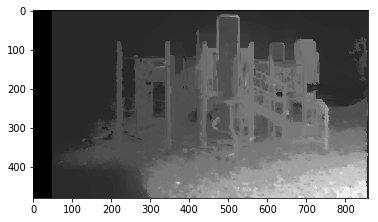

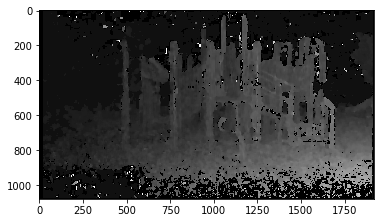

In [32]:
left_image = cv2.imread('frame-left.jpg',0)
right_image = cv2.imread('frame-right.jpg',0)
std_img_size = (858,480)

left_image = cv2.resize(left_image, std_img_size)
right_image = cv2.resize(right_image, std_img_size)
        
#blurL = cv2.GaussianBlur(rawL,(51,51));
#blurR = cv2.GaussianBlur(rawR,(51,51));

#imgL = cv2.cvtColor(blurL,cv2.COLOR_BGR2GRAY)
#imgR = cv2.cvtColor(blurR,cv2.COLOR_BGR2GRAY)

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
#stereo = cv2.StereoBM(cv2.STEREO_BM_BASIC_PRESET,ndisparities=64, SADWindowSize=25)
#disparity = stereo.compute(imgL,imgR)


disparity = stereo.compute(rawL,rawR)
#disparity = cv2.normalize(src=disparity, dst=disparity, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX)

#cv2.imwrite("Test5.jpg", disparity)
plt.imshow(disparity,'gray')